<a href="https://colab.research.google.com/github/adeni-7007/low-code-book-projects/blob/main/Tensor_Zalando_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print('TensorFlow version:', tf.__version__)

TensorFlow version: 2.14.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data() #train_images, train_labels in Tupels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print('train images shape: ', x_train.shape, '\ntest images shape: ', x_test.shape)
print('train labels length: ', len(y_train), '\ntest labels length: ', len(y_test))
y_train


train images shape:  (60000, 28, 28) 
test images shape:  (10000, 28, 28)
train labels length:  60000 
test labels length:  10000


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

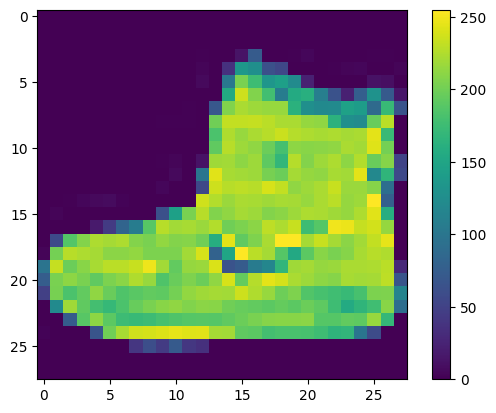

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
x_train, x_test = x_train/255.0, x_test/255.0

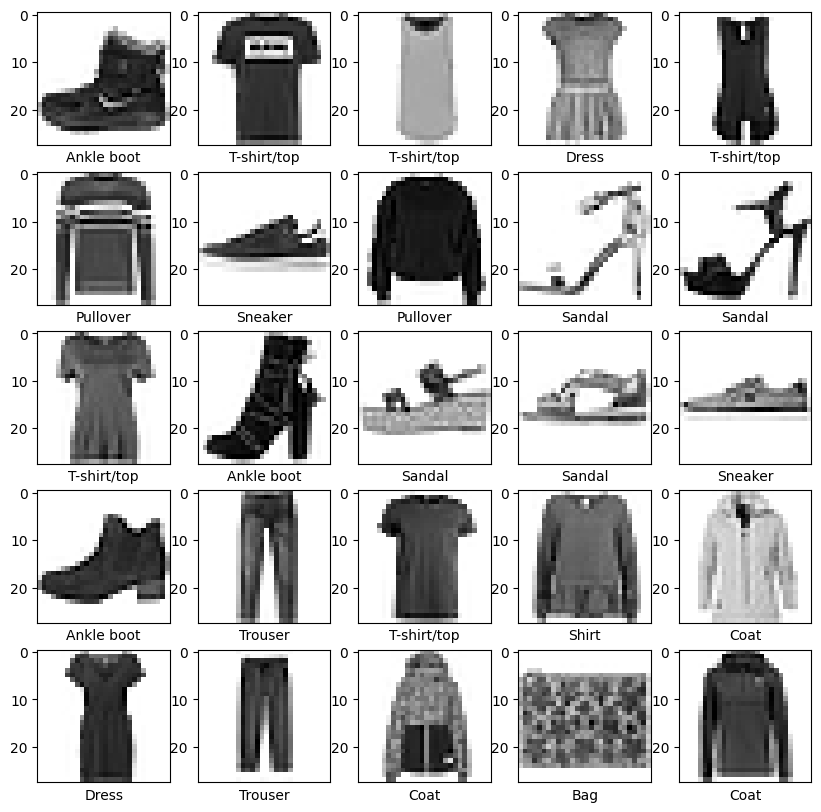

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    #plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
input = tf.keras.Input(shape = (28, 28))
#flatten = tf.keras.layers.Flatten()#flatten - объект, представляющий этот слой
#x = flatten(input)#flatten-'callable'
x = tf.keras.layers.Flatten()(input)
y = tf.keras.layers.Dense(128, activation=tf.keras.activations.relu)(x)
z = tf.keras.layers.Dropout(0.2)(y)
 #20% нейронов будет присвоено значение 0, чтобы избежать overfitting
output = tf.keras.layers.Dense(10, activation='softmax')(z) #Klassifikation


model = tf.keras.Model(inputs = input, outputs = output)

#Input Layer -> Dense -> Flatten -> Dropout -> Dense

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])#чтобы TensorFlow учитывал только верные примеры

In [10]:
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.5293 - accuracy: 0.8129
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4008 - accuracy: 0.8555
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3673 - accuracy: 0.8659
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3457 - accuracy: 0.8730
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3304 - accuracy: 0.8793
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3185 - accuracy: 0.8827
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3058 - accuracy: 0.8873
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2969 - accuracy: 0.8904
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2909 - accuracy: 0.8913
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3652 - accuracy:

[0.36517107486724854, 0.8780999779701233]